# **ECG Heartbeat Classification**
In this practice we will detect cases of cardiovascular disease througth the analysis of heardbeats

This exercise is based on [paper](https://arxiv.org/pdf/1805.00794.pdf) that solves the problem we are facing.


# **1. Data Analysis**

## Library Import

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset Import

In [108]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
data = pd.read_csv('/content/drive/MyDrive/datasets/DL1_ECD/mitbih_train.csv', header=None)

In [110]:
data.shape

(87554, 188)

In [111]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each column represents an elctrocardiogram reading (at 125hz). In total thera are 187 readings, in this columns we have about a second and half off keystrokes. The last column contains the category to which these keystrokes belong. In total there are five, each represented by a number:
- Normal:0
- Premature arrhythmia:1
- Ventricular premature contraction or Ventricular escape:2
- Fusion of ventricular and normal contraction:3
- Resuscitation, fusion of normal and resucitation or unclassifiable:4


## Data Distribution

In [112]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


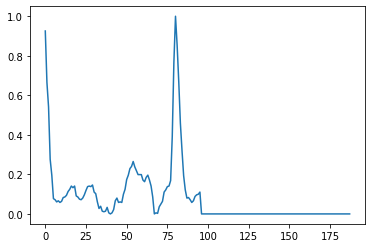

In [113]:
plt.plot(data.iloc[3])

# **2. Data Pocessing**

Now that we have visualized our data, let is work with it. Firs to divide them to imput and output.

In [114]:
# Converting the Dataset to a Numpy array
M = data.values
X = M[ : ,:-1] # Matriz M without the last column
y = M[ : , -1].astype(int) # The last column of M
y

array([0, 0, 0, ..., 4, 4, 4])

Arrays are created with the indices of the examples that belong to each category. can be used [np.argwhere](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html) and [np.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) 

In [115]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()
C4

array([81123, 81124, 81125, ..., 87551, 87552, 87553])

In [116]:
# count how many examples we have of each category
u = {'N': C0, 'S': C1, 'V': C2, 'F': C3, 'Q': C4}
www = []
for k in u:
    print('Hay {} muestras de la categoría {}'.format(len(u[k]), k))
    www.append(len(u[k]))

Hay 72471 muestras de la categoría N
Hay 2223 muestras de la categoría S
Hay 5788 muestras de la categoría V
Hay 641 muestras de la categoría F
Hay 6431 muestras de la categoría Q


In [117]:
www

[72471, 2223, 5788, 641, 6431]

To better see how many of each type we have, we are going to make a bar graphand a plot [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

<BarContainer object of 5 artists>

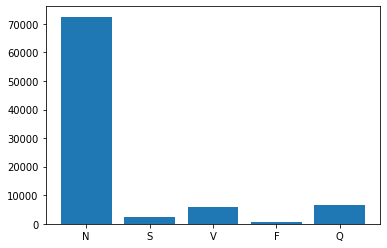

In [118]:
labels = list(u.keys())
plt.bar(labels, www)

We can print an electrocardiogram of each type

Text(0.5, 1.0, 'Different classes')

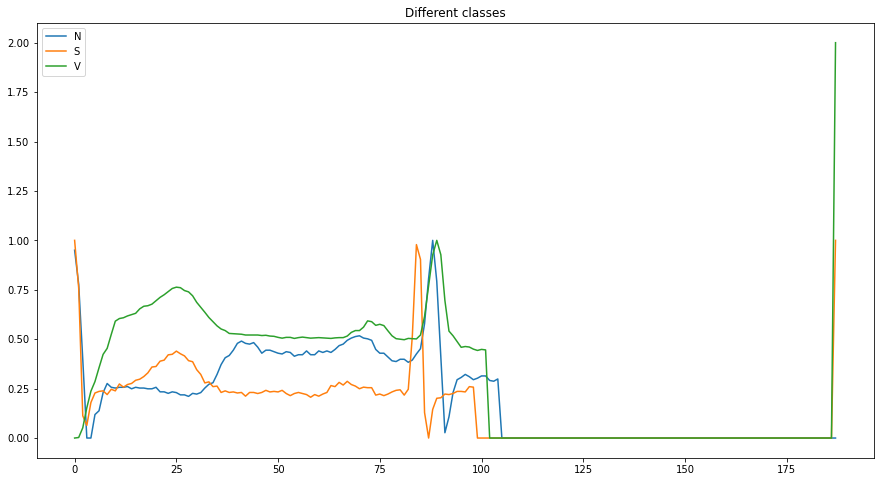

In [119]:
plt.figure(figsize=(15,8))
plt.plot(M[C0[20]], label='N')
plt.plot(M[C1[20]], label='S')
plt.plot(M[C2[20]], label='V')
plt.legend()
plt.title('Different classes')

## Data preparation

The best way to deal with categories is to use a OneHotEncoding.

For each column in the original Y, five have been created, and that the values of the original and the OneHotEncoding correspond to each other.

In [120]:
from keras.utils.np_utils import to_categorical
y_Hot = to_categorical(y, num_classes = 5)

In [121]:
print(y.shape)
print(y_Hot.shape)
print(y[20000])
print(y_Hot[20000])

(87554,)
(87554, 5)
0
[1. 0. 0. 0. 0.]


We can mix X and Y randomly using [shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html).

In [122]:
import sklearn
X_shuffled, y_shuffled = sklearn.utils.shuffle(X, y_Hot)

In [123]:
assert X_shuffled.shape == X.shape
assert y_shuffled.shape == y_Hot.shape

In [124]:
# We free memory
del X
del y_Hot

To be able to enter the data in the model, we need each information point to be only inside the array (we cannot give an array as a value). Before we had the data structured like this:

$ X = [[a_1,a_2,a_3...,a_n],[b_1,b_2,b_3...,b_n]...[z_1,z_2,z_3,z_n] $

In order to use them we need to isolate each of these values, without eliminating their grouping for examples. Namely:

$ X = [[[a_1],[a_2],[a_3]...,[a_n]],[[b_1],[b_2],[b_3]...,[b_n]]...[[z_1],[z_2],[z_3],[z_n]] $

Use [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) de numpy.

In [125]:
X_shuffled

array([[0.98121083, 0.91022962, 0.58037579, ..., 0.        , 0.        ,
        0.        ],
       [0.93700784, 0.83779526, 0.23307087, ..., 0.        , 0.        ,
        0.        ],
       [0.55839413, 0.48175183, 0.21897811, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.85803759, 0.59707725, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.84025562, 0.4888179 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.81860465, 0.48837209, ..., 0.        , 0.        ,
        0.        ]])

In [126]:
X = np.expand_dims(X_shuffled, 2)
X

array([[[0.98121083],
        [0.91022962],
        [0.58037579],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.93700784],
        [0.83779526],
        [0.23307087],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.55839413],
        [0.48175183],
        [0.21897811],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[1.        ],
        [0.85803759],
        [0.59707725],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.84025562],
        [0.4888179 ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.81860465],
        [0.48837209],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

We do a train_test_split and everything would be ready to implement the model.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_shuffled, test_size=0.2)

# **3. AI Model** 

In [128]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import tensorflow
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils

from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import itertools

Define:
- Input length.
- Neurons in the last layer
- Batch_size for training with SGD.

In [129]:
signal_length = 187
batch_size = 256
n_classes = 5

## Model

In [130]:
model = Sequential()

model.add(Conv1D(32, kernel_size=(5), input_shape=(signal_length, 1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 183, 32)           192       
                                                                 
 dropout_15 (Dropout)        (None, 183, 32)           0         
                                                                 
 batch_normalization_12 (Bat  (None, 183, 32)          128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 183, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 180, 32)           4128      
                                                                 
 dropout_16 (Dropout)        (None, 180, 32)           0         
                                                      

To compile the model, .compile() is called. Here we specify which loss function we use, which optimizer and which metrics we want to keep for each epoch.

In [131]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

We train the model a number of epochs and with a specified batch_size. This returns us a history object with the accuracy of all the training phases.

## Training

In [132]:
history = model.fit(X_train, y_train,
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/75
274/274 [==============================] - 5s 12ms/step - loss: 0.4623 - accuracy: 0.8671 - val_loss: 0.8270 - val_accuracy: 0.8314
Epoch 2/75
274/274 [==============================] - 3s 10ms/step - loss: 0.2799 - accuracy: 0.9233 - val_loss: 0.5228 - val_accuracy: 0.8757
Epoch 3/75
274/274 [==============================] - 3s 11ms/step - loss: 0.2373 - accuracy: 0.9353 - val_loss: 0.2526 - val_accuracy: 0.9398
Epoch 4/75
274/274 [==============================] - 3s 10ms/step - loss: 0.2097 - accuracy: 0.9405 - val_loss: 0.2173 - val_accuracy: 0.9407
Epoch 5/75
274/274 [==============================] - 3s 10ms/step - loss: 0.1953 - accuracy: 0.9457 - val_loss: 0.1981 - val_accuracy: 0.9447
Epoch 6/75
274/274 [==============================] - 3s 11ms/step - loss: 0.1817 - accuracy: 0.9491 - val_loss: 0.1747 - val_accuracy: 0.9503
Epoch 7/75
274/274 [==============================] - 3s 11ms/step - loss: 0.1737 - accuracy: 0.9508 - val_loss: 0.1555 - val_accuracy: 0.9548

Access to the historical accuracy of the model (with the history attribute)

In [133]:
history.history

{'accuracy': [0.867095947265625,
  0.9232757091522217,
  0.9352540373802185,
  0.9405079483985901,
  0.9457333087921143,
  0.949145495891571,
  0.9507731199264526,
  0.9535713791847229,
  0.9548277258872986,
  0.9564124941825867,
  0.9573833346366882,
  0.9593107104301453,
  0.9601673483848572,
  0.9615236520767212,
  0.9620804190635681,
  0.9622803330421448,
  0.9627514481544495,
  0.9640506505966187,
  0.9640506505966187,
  0.9651214480400085,
  0.9652356505393982,
  0.966649055480957,
  0.9664492011070251,
  0.9670630693435669,
  0.9667490124702454,
  0.9678911566734314,
  0.9683337211608887,
  0.9678055047988892,
  0.9686620831489563,
  0.9694045186042786,
  0.9691903591156006,
  0.96900475025177,
  0.969218909740448,
  0.9696043729782104,
  0.9700326919555664,
  0.9694187641143799,
  0.9704895615577698,
  0.9701326489448547,
  0.9709892272949219,
  0.9708322286605835,
  0.9712747931480408,
  0.9718173146247864,
  0.971217691898346,
  0.9706323146820068,
  0.9711748361587524,
  0.9

To see if our model is overfitting, a graph is drawn with the accuracy in train and in validation using the data from the history object.

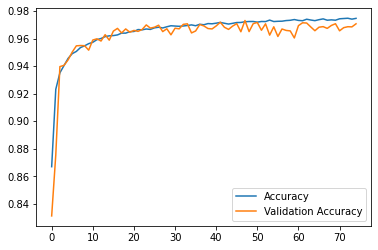

In [145]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

And the Loss

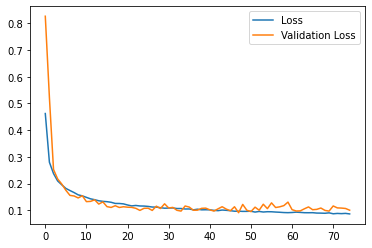

In [144]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.legend()

## Model Test



In [152]:
y_pred = model.predict(X_test, batch_size=1000)
y_pred.shape

(17511, 5)

[1. 0. 0. 0. 0.]


<BarContainer object of 5 artists>

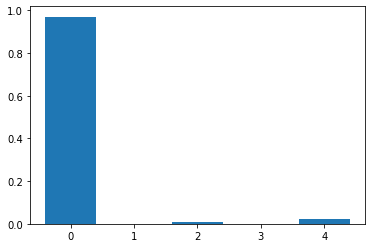

In [148]:
print(y_test[299])
plt.bar(range(n_classes), height=y_pred[4])

This code snippet generates a model report, and the next a confusion matrix.

In [149]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14558
           1       0.89      0.60      0.71       414
           2       0.98      0.81      0.89      1145
           3       0.77      0.66      0.71       136
           4       0.98      0.96      0.97      1258

    accuracy                           0.97     17511
   macro avg       0.92      0.81      0.85     17511
weighted avg       0.97      0.97      0.97     17511



Normalized confusion matrix


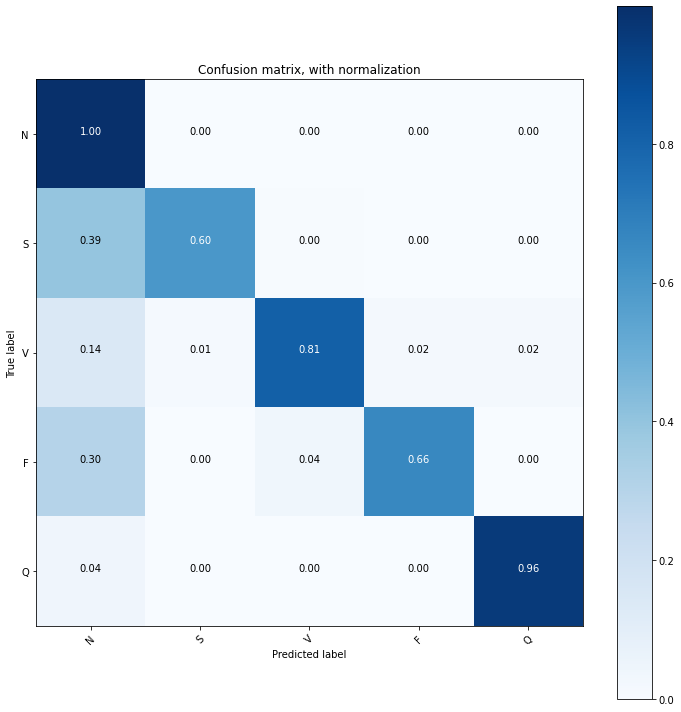

In [150]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()